<a href="http://www.stfc.ac.uk/"> <img src="../img/STFCLargeColour.jpg" width="50%" align="left"/></a>
<a href="https://www.addopt.org/"><img src="../img/ADDoPT-logo-MAIN-with-text.png" width="300" height="200" align="right"/></a>


In [1]:
import sys
sys.path.append("../lib/")
import models
import pandas, random, math
from sklearn import metrics
import numpy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

models.hideAnswers

Imported models functions


# Evaluating a Regression Model

There are several summary statistics that indicate the quality of a regressor. Let's generate some models and compare the statistics.

Which of these two models are better?

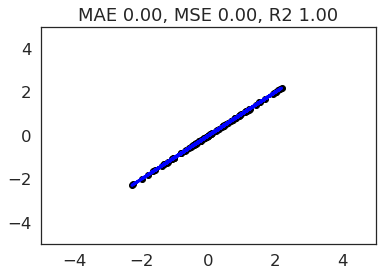

In [69]:
from sklearn import linear_model
from sklearn.metrics import *
from math import pi, tan


#gradient = random.uniform(-1, 1)
#noise = random.expovariate(10)
#nonlinearity = random.expovariate(5)
#print('true gradient', gradient, 'noise variance', noise**2, 'nonlinearity', nonlinearity)


def fit(xs, ys):
    model = linear_model.LinearRegression(fit_intercept=False)
    model.fit(xs, ys)
    predicted = model.predict(xs)

    # Plot outputs
    plt.figure()
    plt.xlim([-5.0, 5.0])
    plt.ylim([-5.0, 5.0])
    plt.scatter(xs, ys,  color='black')
    plt.plot(xs, predicted, color='blue', linewidth=3)
    plt.title('MAE {:.2f}, MSE {:.2f}, R2 {:.2f}'.format(
        mean_absolute_error(ys, predicted),
        mean_squared_error(ys, predicted),
        r2_score(ys, predicted))
    )
    plt.show()

# some data
xs = numpy.array([ random.gauss(0, 1) for _ in range(100) ]).reshape(-1, 1)
    
# perfect fit
fit(xs, xs)

Above you see a perfect fit.

## Gaussian noise
Next, we add some normally distributed noise to the y values. Now the model is imperfect. The performance metrics reflect this.

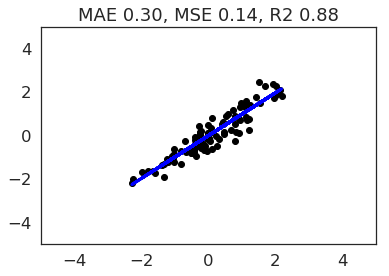

In [70]:

# gaussian noise
fit(xs, [x+2*random.gauss(0,0.2) for x in xs])

## $R^2$

The next model has the same level of error, but the x values and y values vary more. So the model is surely a better one. 

R squared is defined as:
$$1 - \frac{MSE}{Variance}$$

This is the fraction of the variance of y which is explained by the model.

In [72]:

# more variation in xs
xs2 = numpy.array([ random.gauss(0, 2) for _ in range(100) ]).reshape(-1, 1)
# gaussian noise
fit(xs2, [x+2*random.gauss(0,0.2) for x in xs2])

## Lorenzian noise
The Mean Square Error attachs a lot of importance to the most distance outliers, so MSE and $R^2$ can become a lot worse with non-normal noise.

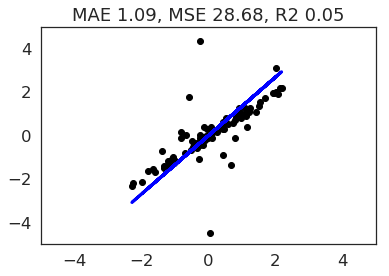

In [76]:

fit(xs, [x+0.1*tan(pi*random.uniform(-1,1)) for x in xs])



## Further reading

For more information on the topics covered here:
 [Sklearn's regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
 
 <div class="alert alert-warning" role="alert">
**Exercise**: Add Huber loss and Hinge loss to the titles. Make some more distributions, one which is bad for Huber loss, and one which is bad for hinge loss.


[Up](../Welcome.ipynb)


---------------------------------------------------
Copyright STFC 2018